In [1]:
import pandas as pd

In [7]:
train_data = 'C:\\Users\\bai\\Downloads\\Train\\Train_DataSet.csv'
label_data = 'C:\\Users\\bai\\Downloads\\Train\\Train_DataSet_Label.csv'
train_df = pd.read_csv(train_data)
label_df = pd.read_csv(label_data)

In [8]:
train_df.head()

,id,title,content
0,7a3dd79f90ee419da87190cff60f7a86,问责领导(上黄镇党委书记张涛，宣国才真能一手遮天吗？),这几天看了有人举报施某某的贴子，经与举报人联系证实，是宣某当天中午请举报人和枪手喝酒后，晚上...
1,7640a5589bc7486ca199eeeb38af79dd,江歌事件:教会孩子，善良的同时更要懂得保护自己!,过去一年的江歌悲剧，这几日再次刷屏：住在东京都中野区的中国女留学生江歌，收留了被前男友陈世锋...
2,8c5bda93e4ba401f90a0faa5b28fe57f,"绝味鸭脖广告""开黄腔""引众怒 ""双11""这么拼值吗?",“双11”1600亿的销售额让中国乃至全世界感到震惊，为此，不仅有不惜欠债百万的“剁手党”，...
3,1aa777fed31a4b8a9d866f05b5477557,央视曝光!如东一医药企业将槽罐车改成垃圾车，夜间偷排高浓度废水,2016年以来，如东高新区一家叫做拜瑞生物医药的企业竟然将装废水的槽罐车伪装成洒水车，常年在...
4,6c67ac55360340258e157f3710ebae6c,恶劣至极，央视都曝光了!南通如东一医药企业将槽罐车改成洒水车，夜间偷排高浓度废水...丢大发了!,新闻资讯•民生热点•城市生活•南通人都在看浏览更多资讯请关注微信公众号:南通传媒网昨晚央视一...


In [9]:
label_df.head()

,id,label
0,7a3dd79f90ee419da87190cff60f7a86,2
1,7640a5589bc7486ca199eeeb38af79dd,1
2,8c5bda93e4ba401f90a0faa5b28fe57f,2
3,1aa777fed31a4b8a9d866f05b5477557,2
4,6c67ac55360340258e157f3710ebae6c,2


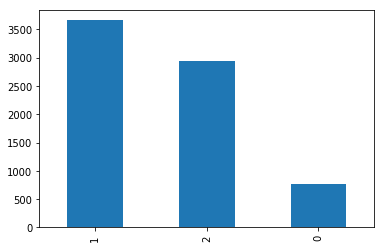

In [12]:
%matplotlib inline
label_df['label'].value_counts().plot.bar()

In [30]:
content_length_count = {0:0}
for index, row in train_df.iterrows():
    c_len = 0
    if type(row['content']) != str:
        content_length_count[0] += 1
        continue
    for x in row['content']:
        c_len += 1
    c_len = int(c_len / 100) + 1
    if c_len not in content_length_count:
        content_length_count[c_len] = 1
    else:
        content_length_count[c_len] += 1

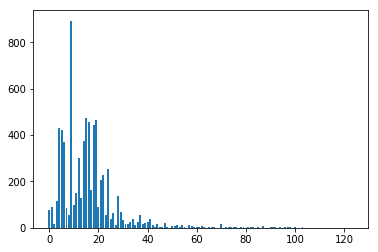

In [31]:
import matplotlib.pyplot as plt
import collections
%matplotlib inline


content_length_count = collections.OrderedDict(content_length_count)
plt.bar(range(len(content_length_count)), list(content_length_count.values()), align='center')
plt.show()

In [20]:
content_length_count

NameError: name 'content_length_count' is not defined

In [16]:
import pandas as pd
import jieba
def stopwordset(stopword_path):
  stopwords = [line.strip() for line in open(stopword_path,encoding='UTF-8').readlines()]
  return set(stopwords)


def seg_sentence(sentence, stopwordlist):
  sentence_depart = jieba.cut(sentence.strip())
  seg_result = [x.strip() for x in sentence_depart if x not in stopwordlist]
  seg_result = [x for x in seg_result if x]
  return seg_result

def gen_data_set(data_path, label_path, stopword_path):
  stopwords = stopwordset(stopword_path)
  data_df = pd.read_csv(data_path)
  label_df = pd.read_csv(label_path)
  label_map = {}
  for index, row in label_df.iterrows():
    label_map[row['id']] = row['label']

  results = []
  for index, row in data_df.iterrows():
    content = row['content']
    if not content or type(content) == float:
      continue
    seg_result = seg_sentence(content, stopwords)
    label = label_map[row['id']]
    results.append([seg_result, label])
  return results

In [17]:
results = gen_data_set('C:\\Users\\bai\\Downloads\\Train\\Train_DataSet.csv',  'C:\\Users\\bai\\Downloads\\Train\\Train_DataSet_Label.csv', 'C:\\Users\\bai\\Documents\\codebase\\DFSolution\\SentimentAnalysis\\stopwords.txt')

In [19]:
results[299]

[['月',
  '26',
  '日',
  '傍晚',
  '点',
  '30',
  '分',
  '大连',
  '甘井子区',
  '华北',
  '路',
  '周水子',
  '立交桥',
  '发生',
  '意外事故',
  '一位',
  '行人',
  '横穿',
  '华北',
  '路时',
  '一辆',
  '大客车',
  '撞倒',
  '事故现场',
  '见到',
  '有人',
  '冒险',
  '穿越',
  '马路',
  '网友',
  '拍摄',
  '现场',
  '照片',
  '事发',
  '地点',
  '位于',
  '周水子',
  '立交桥',
  '沃尔玛',
  '超市',
  '华北',
  '路',
  '路段',
  '一名',
  '行人',
  '躺倒',
  '华北',
  '路',
  '伤情',
  '不详',
  '手中',
  '提着',
  '纸袋子',
  '飞',
  '数米',
  '外',
  '事故现场',
  '马路',
  '中央',
  '人行横道',
  '肇事',
  '大客车',
  '停',
  '不远处',
  '车头',
  '撞击',
  '破损',
  '痕迹',
  '目击者',
  '称',
  '撞',
  '伤者',
  '横穿马路',
  '说法',
  '未',
  '交警部门',
  '进一步',
  '证实',
  '居民',
  '称',
  '居民区',
  '大型',
  '商超',
  '横穿马路',
  '为数不少',
  '事故现场',
  '有人',
  '车流',
  '中',
  '横穿马路',
  '事故',
  '原因',
  '伤者',
  '伤情',
  '进一步',
  '中'],
 2]